In [1]:
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
from scipy import stats as st
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [2]:
df = pd.read_csv('drive/MyDrive/fraud.csv')

In [3]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [5]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df['type'].value_counts()

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

In [8]:
df['type'] = LabelEncoder().fit_transform(df['type'])

In [9]:
fig = px.imshow(df.drop('isFlaggedFraud',axis=1).corr(), text_auto=True)
fig.show()

<ipython-input-9-ad703bf22d42>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  fig = px.imshow(df.drop('isFlaggedFraud',axis=1).corr(), text_auto=True)


<Axes: xlabel='step', ylabel='Count'>

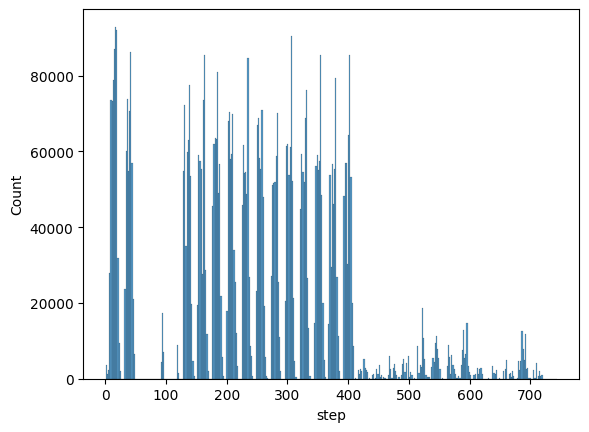

In [10]:
sns.histplot(df['step'])

<Axes: xlabel='amount', ylabel='Count'>

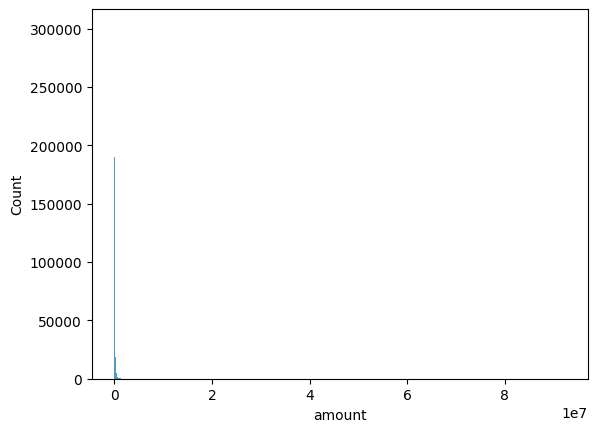

In [11]:
sns.histplot(df['amount'])

<Axes: xlabel='oldbalanceOrg', ylabel='Count'>

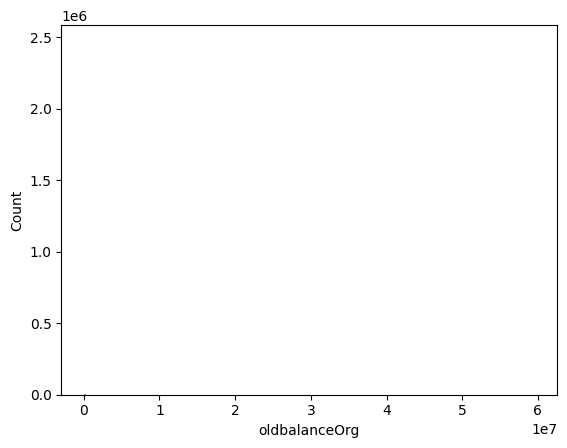

In [12]:
sns.histplot(df['oldbalanceOrg'])

<Axes: xlabel='oldbalanceDest', ylabel='Count'>

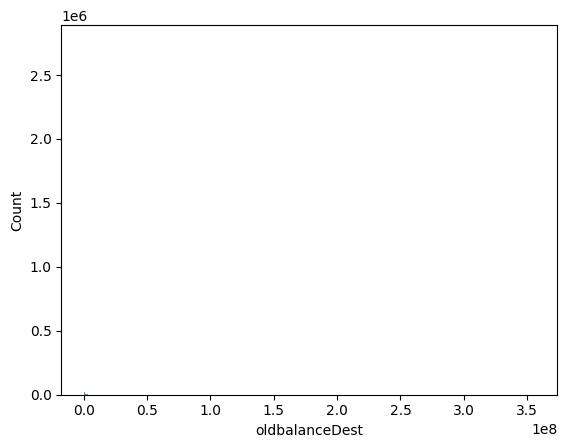

In [13]:
sns.histplot(df['oldbalanceDest'])

In [14]:
df['amount'] = np.log(df['amount'])
df['oldbalanceOrg'] = np.log(df['oldbalanceOrg'])
df['oldbalanceDest'] = np.log(df['oldbalanceDest'])

/usr/local/lib/python3.9/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning:

divide by zero encountered in log



In [15]:
df.describe()

/usr/local/lib/python3.9/dist-packages/numpy/lib/function_base.py:4486: RuntimeWarning:

invalid value encountered in subtract

/usr/local/lib/python3.9/dist-packages/numpy/lib/function_base.py:4486: RuntimeWarning:

invalid value encountered in subtract



,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.714150e+00,-inf,-inf,8.551137e+05,-inf,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,1.350117e+00,NaN,NaN,2.924049e+06,NaN,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,-inf,-inf,0.000000e+00,-inf,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.000000e+00,9.502231e+00,NaN,0.000000e+00,NaN,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,1.000000e+00,1.122353e+01,9.561560e+00,0.000000e+00,1.179589e+01,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,3.000000e+00,1.224876e+01,1.158353e+01,1.442584e+05,1.375686e+01,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,4.000000e+00,1.834213e+01,1.790292e+01,4.958504e+07,1.969049e+01,3.561793e+08,1.000000e+00,1.000000e+00


In [16]:
df = df[~(df['amount'] == -np.inf)]
df = df[~(df['oldbalanceOrg'] == -np.inf)]
df = df[~(df['oldbalanceDest'] == -np.inf)]

In [17]:
df.describe()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,2.331888e+06,2.331888e+06,2.331888e+06,2.331888e+06,2.331888e+06,2.331888e+06,2.331888e+06,2.331888e+06,2331888.0
mean,2.433306e+02,7.290320e-01,1.171859e+01,1.181687e+01,2.253654e+06,1.320845e+01,1.764829e+06,1.216611e-03,0.0
std,1.439149e+02,1.086696e+00,1.247139e+00,3.015882e+00,4.492558e+06,1.687576e+00,3.965886e+06,3.485873e-02,0.0
min,1.000000e+00,0.000000e+00,-3.218876e+00,-2.995732e+00,0.000000e+00,-4.605170e+00,0.000000e+00,0.000000e+00,0.0
25%,1.550000e+02,0.000000e+00,1.119504e+01,9.900383e+00,0.000000e+00,1.224665e+01,2.340009e+05,0.000000e+00,0.0
50%,2.370000e+02,0.000000e+00,1.193755e+01,1.151741e+01,1.485905e+05,1.330912e+01,6.679911e+05,0.000000e+00,0.0
75%,3.350000e+02,1.000000e+00,1.248489e+01,1.465658e+01,2.479881e+06,1.436328e+01,1.840051e+06,0.000000e+00,0.0
max,7.430000e+02,4.000000e+00,1.787229e+01,1.759557e+01,4.368662e+07,1.968919e+01,3.553814e+08,1.000000e+00,0.0


In [18]:
df = df[~(abs(st.zscore(df['amount'])) > 2.2)]
df = df[~(abs(st.zscore(df['oldbalanceOrg'])) > 2.5)]
df = df[~(abs(st.zscore(df['oldbalanceDest'])) > 2.5)]

<Axes: xlabel='step', ylabel='Count'>

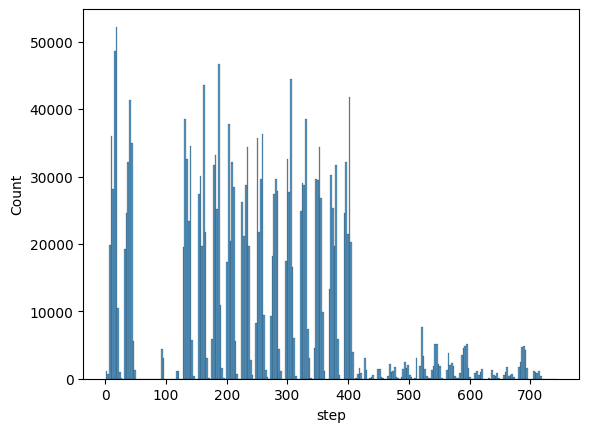

In [19]:
sns.histplot(df['step'])

<Axes: xlabel='amount', ylabel='Count'>

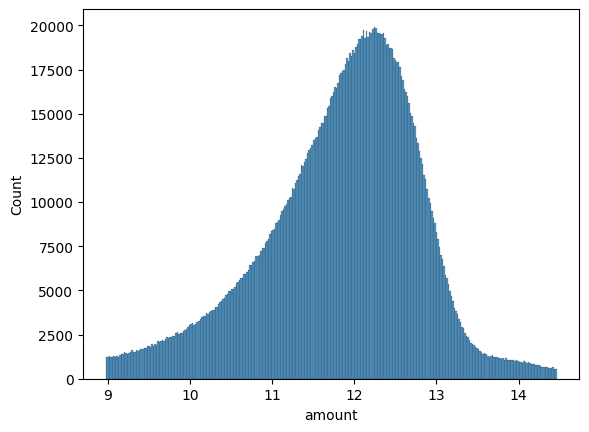

In [20]:
sns.histplot(df['amount'])

<Axes: xlabel='oldbalanceOrg', ylabel='Count'>

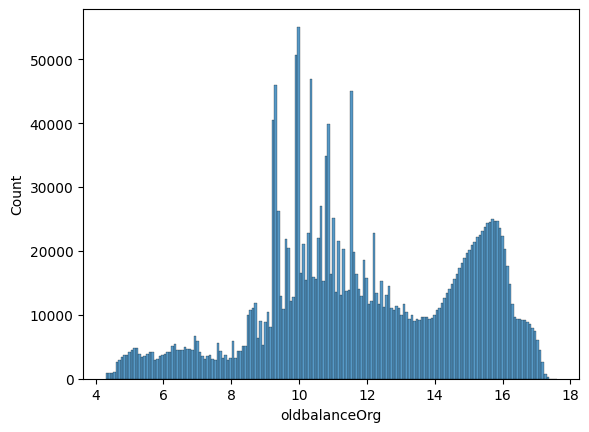

In [21]:
sns.histplot(df['oldbalanceOrg'])

<Axes: xlabel='oldbalanceDest', ylabel='Count'>

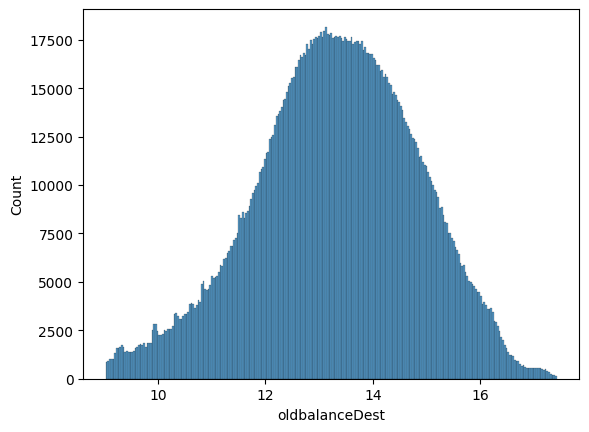

In [22]:
sns.histplot(df['oldbalanceDest'])

In [23]:
X = df.drop(['isFraud','nameOrig','nameDest','isFlaggedFraud','newbalanceOrig','newbalanceDest'],axis=1)
y = df['isFraud']

In [24]:
y.value_counts()

0    2175007
1       2102
Name: isFraud, dtype: int64

In [25]:
X_sampled, y_sampled = RandomUnderSampler().fit_resample(X,y)

In [26]:
fig = px.pie(y_sampled, names=y_sampled)
fig.show()

In [27]:
fig = px.pie(X_sampled, names='type')
fig.show()

In [28]:
fig = px.scatter(x=X_sampled['oldbalanceOrg'],y=X_sampled['oldbalanceDest'])
fig.show()

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X_sampled, y_sampled, test_size=0.2)

In [30]:
X_train_scaled = StandardScaler().fit_transform(X_train)
X_test_scaled = StandardScaler().fit_transform(X_test)

In [31]:
tree = DecisionTreeClassifier()
tree.fit(X_train_scaled,y_train)
print(tree.score(X_test_scaled,y_test))
y_pred = tree.predict(X_test_scaled)

0.9500594530321046


In [32]:
pickle.dump(tree, open('TreeModelSaved', 'wb'))